# Domain Analysis

## Importiong Libraries and read data

In [7]:
# Importing essential librariies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Read the dataset
data=pd.read_csv("crime_dataset_india.csv")

In [9]:
# Print data
data

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


## Data Preprocessing

In [12]:
# Renaming the columns name for easy access.
data.rename(columns={"Report Number":"report_number","Crime Code":"crime_code","Crime Description":"crime_description","Victim Age":"victim_age","Victim Gender":"victim_gender"},inplace=True)

In [16]:
# Renaming the columns name for easy access.
data.rename(columns={"Weapon Used":"weapon_used","Crime Domain":"crime_domain","Police Deployed":"police_deploy","Case Closed":"case_closed"},inplace=True)

In [18]:
# Deleting the column for no use.
data.drop("report_number",axis=1,inplace=True)

In [20]:
# Applying label encoding for converting categorical column in numerical column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["case_closed"]=le.fit_transform(data["case_closed"])
data["victim_gender"]=le.fit_transform(data["victim_gender"])
data["crime_description"]=le.fit_transform(data["crime_description"])
data["City"]=le.fit_transform(data["City"])
data["crime_domain"]=le.fit_transform(data["crime_domain"])
data["Date Case Closed"]=le.fit_transform(data["Date Case Closed"])
data["Date of Occurrence"]=le.fit_transform(data["Date of Occurrence"])
data["Date Reported"]=le.fit_transform(data["Date Reported"])
data["Time of Occurrence"]=le.fit_transform(data["Time of Occurrence"])
data["weapon_used"]=le.fit_transform(data["weapon_used"])

In [21]:
# Describe the information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Date Reported       40160 non-null  int32
 1   Date of Occurrence  40160 non-null  int32
 2   Time of Occurrence  40160 non-null  int32
 3   City                40160 non-null  int32
 4   crime_code          40160 non-null  int64
 5   crime_description   40160 non-null  int32
 6   victim_age          40160 non-null  int64
 7   victim_gender       40160 non-null  int32
 8   weapon_used         40160 non-null  int32
 9   crime_domain        40160 non-null  int32
 10  police_deploy       40160 non-null  int64
 11  case_closed         40160 non-null  int32
 12  Date Case Closed    40160 non-null  int32
dtypes: int32(10), int64(3)
memory usage: 2.5 MB


In [24]:
# Describe mean,max,count,std of data
data.describe()

,Date Reported,Date of Occurrence,Time of Occurrence,City,crime_code,crime_description,victim_age,victim_gender,weapon_used,crime_domain,police_deploy,case_closed,Date Case Closed
count,40160.000000,40160.000000,40160.000000,40160.000000,40160.000000,40160.000000,40160.00000,40160.000000,40160.000000,40160.000000,40160.000000,40160.000000,40160.000000
mean,12783.334089,20079.500000,19943.323780,11.153088,349.360259,9.995369,44.49126,0.549527,3.003635,1.523755,10.006250,0.499552,12011.328660
std,7369.870079,11593.337742,11511.546296,7.623382,144.169205,6.051752,20.22555,0.680658,2.002125,1.005616,5.467951,0.500006,5163.728513
min,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,10.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6385.750000,10039.750000,9973.750000,5.000000,225.000000,5.000000,27.00000,0.000000,1.000000,1.000000,5.000000,0.000000,8008.750000
50%,12789.500000,20079.500000,19948.500000,10.000000,349.000000,10.000000,44.00000,0.000000,3.000000,1.000000,10.000000,0.000000,16011.000000
75%,19180.250000,30119.250000,29903.250000,17.000000,474.000000,15.000000,62.00000,1.000000,5.000000,3.000000,15.000000,1.000000,16011.000000
max,25545.000000,40159.000000,39885.000000,28.000000,599.000000,20.000000,79.00000,2.000000,6.000000,3.000000,19.000000,1.000000,16011.000000


In [26]:
#Checking the null value is present or not
data.isnull().sum()

Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
crime_code            0
crime_description     0
victim_age            0
victim_gender         0
weapon_used           0
crime_domain          0
police_deploy         0
case_closed           0
Date Case Closed      0
dtype: int64

1.Null value is present in two columns.
2.Weapon used and Date case closed contain 5790 and 20098 null values are present.

In [29]:
# Fill null values
data.fillna(0, inplace=True)

In [31]:
data.isnull().sum()

Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
crime_code            0
crime_description     0
victim_age            0
victim_gender         0
weapon_used           0
crime_domain          0
police_deploy         0
case_closed           0
Date Case Closed      0
dtype: int64

In [33]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(duplicates)

0


In [35]:
data

,Date Reported,Date of Occurrence,Time of Occurrence,City,crime_code,crime_description,victim_age,victim_gender,weapon_used,crime_domain,police_deploy,case_closed,Date Case Closed
0,836,0,0,1,576,11,16,1,0,3,13,0,16011
1,2,1,1,4,128,10,37,1,5,1,9,0,16011
2,838,2,3,15,271,13,48,0,0,1,15,0,16011
3,0,3,4,21,170,2,49,0,2,1,1,1,14808
4,3,4,5,21,421,19,30,0,4,1,18,1,3645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,585,25467,39598,13,312,3,78,0,2,1,12,0,16011
40156,25358,25468,39597,17,300,12,75,0,6,1,2,1,15070
40157,1429,25469,39606,12,423,20,68,1,4,3,6,0,16011
40158,586,25470,39599,20,311,16,11,1,0,3,1,0,16011


## Feature Selection

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
data[["City","crime_code","crime_description","victim_age","victim_gender","crime_domain","police_deploy"]]=sc.fit_transform(data[["City","crime_code","crime_description","victim_age","victim_gender","crime_domain","police_deploy"]])

<Axes: >

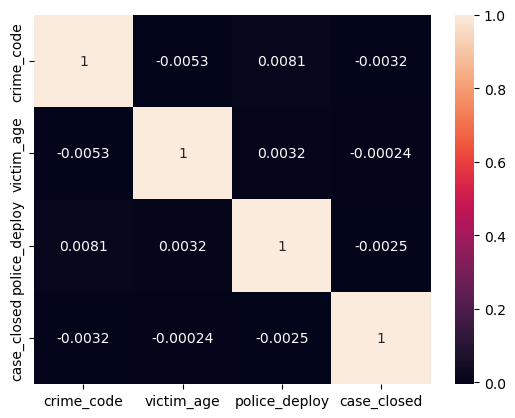

In [38]:
sns.heatmap(data[["crime_code","victim_age","police_deploy","case_closed"]].corr(),annot=True)

In [39]:
# Print names of columns.
data.columns

Index(['Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City',
       'crime_code', 'crime_description', 'victim_age', 'victim_gender',
       'weapon_used', 'crime_domain', 'police_deploy', 'case_closed',
       'Date Case Closed'],
      dtype='object')

## Model Application

In [41]:
# Seprating independent and dependent column
x=data.loc[:,[ 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'crime_code', 'crime_description',
       'victim_age', 'victim_gender', 'weapon_used', 'crime_domain',
       'police_deploy','Date Case Closed']]
y=data.case_closed

In [42]:
# Importing train test split
from sklearn.model_selection import train_test_split

In [43]:
# Differentiating the train and test values
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

In [44]:
x_train

,Date Reported,Date of Occurrence,Time of Occurrence,City,crime_code,crime_description,victim_age,victim_gender,weapon_used,crime_domain,police_deploy,Date Case Closed
15295,24086,31167,37598,0.428571,0.877756,0.90,0.927536,0.5,3,0.666667,0.388889,8727
1986,21121,9786,29096,0.285714,0.601202,0.95,0.942029,0.0,2,0.333333,0.222222,16011
35358,10978,1542,15822,1.000000,0.008016,0.25,0.855072,0.5,0,1.000000,0.333333,15724
29248,3699,14776,4487,0.607143,0.358717,0.40,0.550725,0.0,0,0.000000,1.000000,11763
18064,19307,2584,28901,0.464286,0.935872,1.00,0.739130,0.5,6,1.000000,0.111111,8447
...,...,...,...,...,...,...,...,...,...,...,...,...
32488,13215,29880,19387,0.785714,0.941884,0.45,0.434783,0.0,6,0.333333,0.166667,5142
16912,6636,37608,7802,0.142857,0.847695,1.00,0.913043,1.0,1,1.000000,0.166667,16011
25495,24229,36951,36578,0.285714,0.747495,0.10,0.898551,0.0,2,0.333333,0.222222,4876
1032,10160,5160,15834,0.857143,0.653307,0.20,0.971014,0.0,6,0.333333,0.166667,16011


In [45]:
y_test

19689    0
31598    0
21153    0
18139    1
2279     0
        ..
32133    0
27934    1
34237    0
23354    1
7030     1
Name: case_closed, Length: 8032, dtype: int32

## 1.Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_predict=clf.predict(x_test)

In [49]:
y_predict

array([0, 0, 1, ..., 0, 1, 0])

In [50]:
y_pred_prob=clf.predict_proba(x_test)
y_pred_prob

array([[0.94322608, 0.05677392],
       [0.9124012 , 0.0875988 ],
       [0.31690436, 0.68309564],
       ...,
       [0.89931572, 0.10068428],
       [0.01309068, 0.98690932],
       [0.8110113 , 0.1889887 ]])

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [52]:
# Generate the classification report
print(classification_report(y_test, y_predict))
print("Accuracy:", accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4037
           1       0.93      0.81      0.86      3995

    accuracy                           0.87      8032
   macro avg       0.88      0.87      0.87      8032
weighted avg       0.88      0.87      0.87      8032

Accuracy: 0.8727589641434262


#### Cross validation

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,x,y,cv=10,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std

[0.85960523 0.87516565 0.87727891 0.87486631 0.91402014 0.8733945
 0.87191478 0.85072231 0.88242861 0.87853488]
Cross validation Score: 0.8757931313913959
Std : 0.015581079735471785


### 3.KNN Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor # For regression task
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score

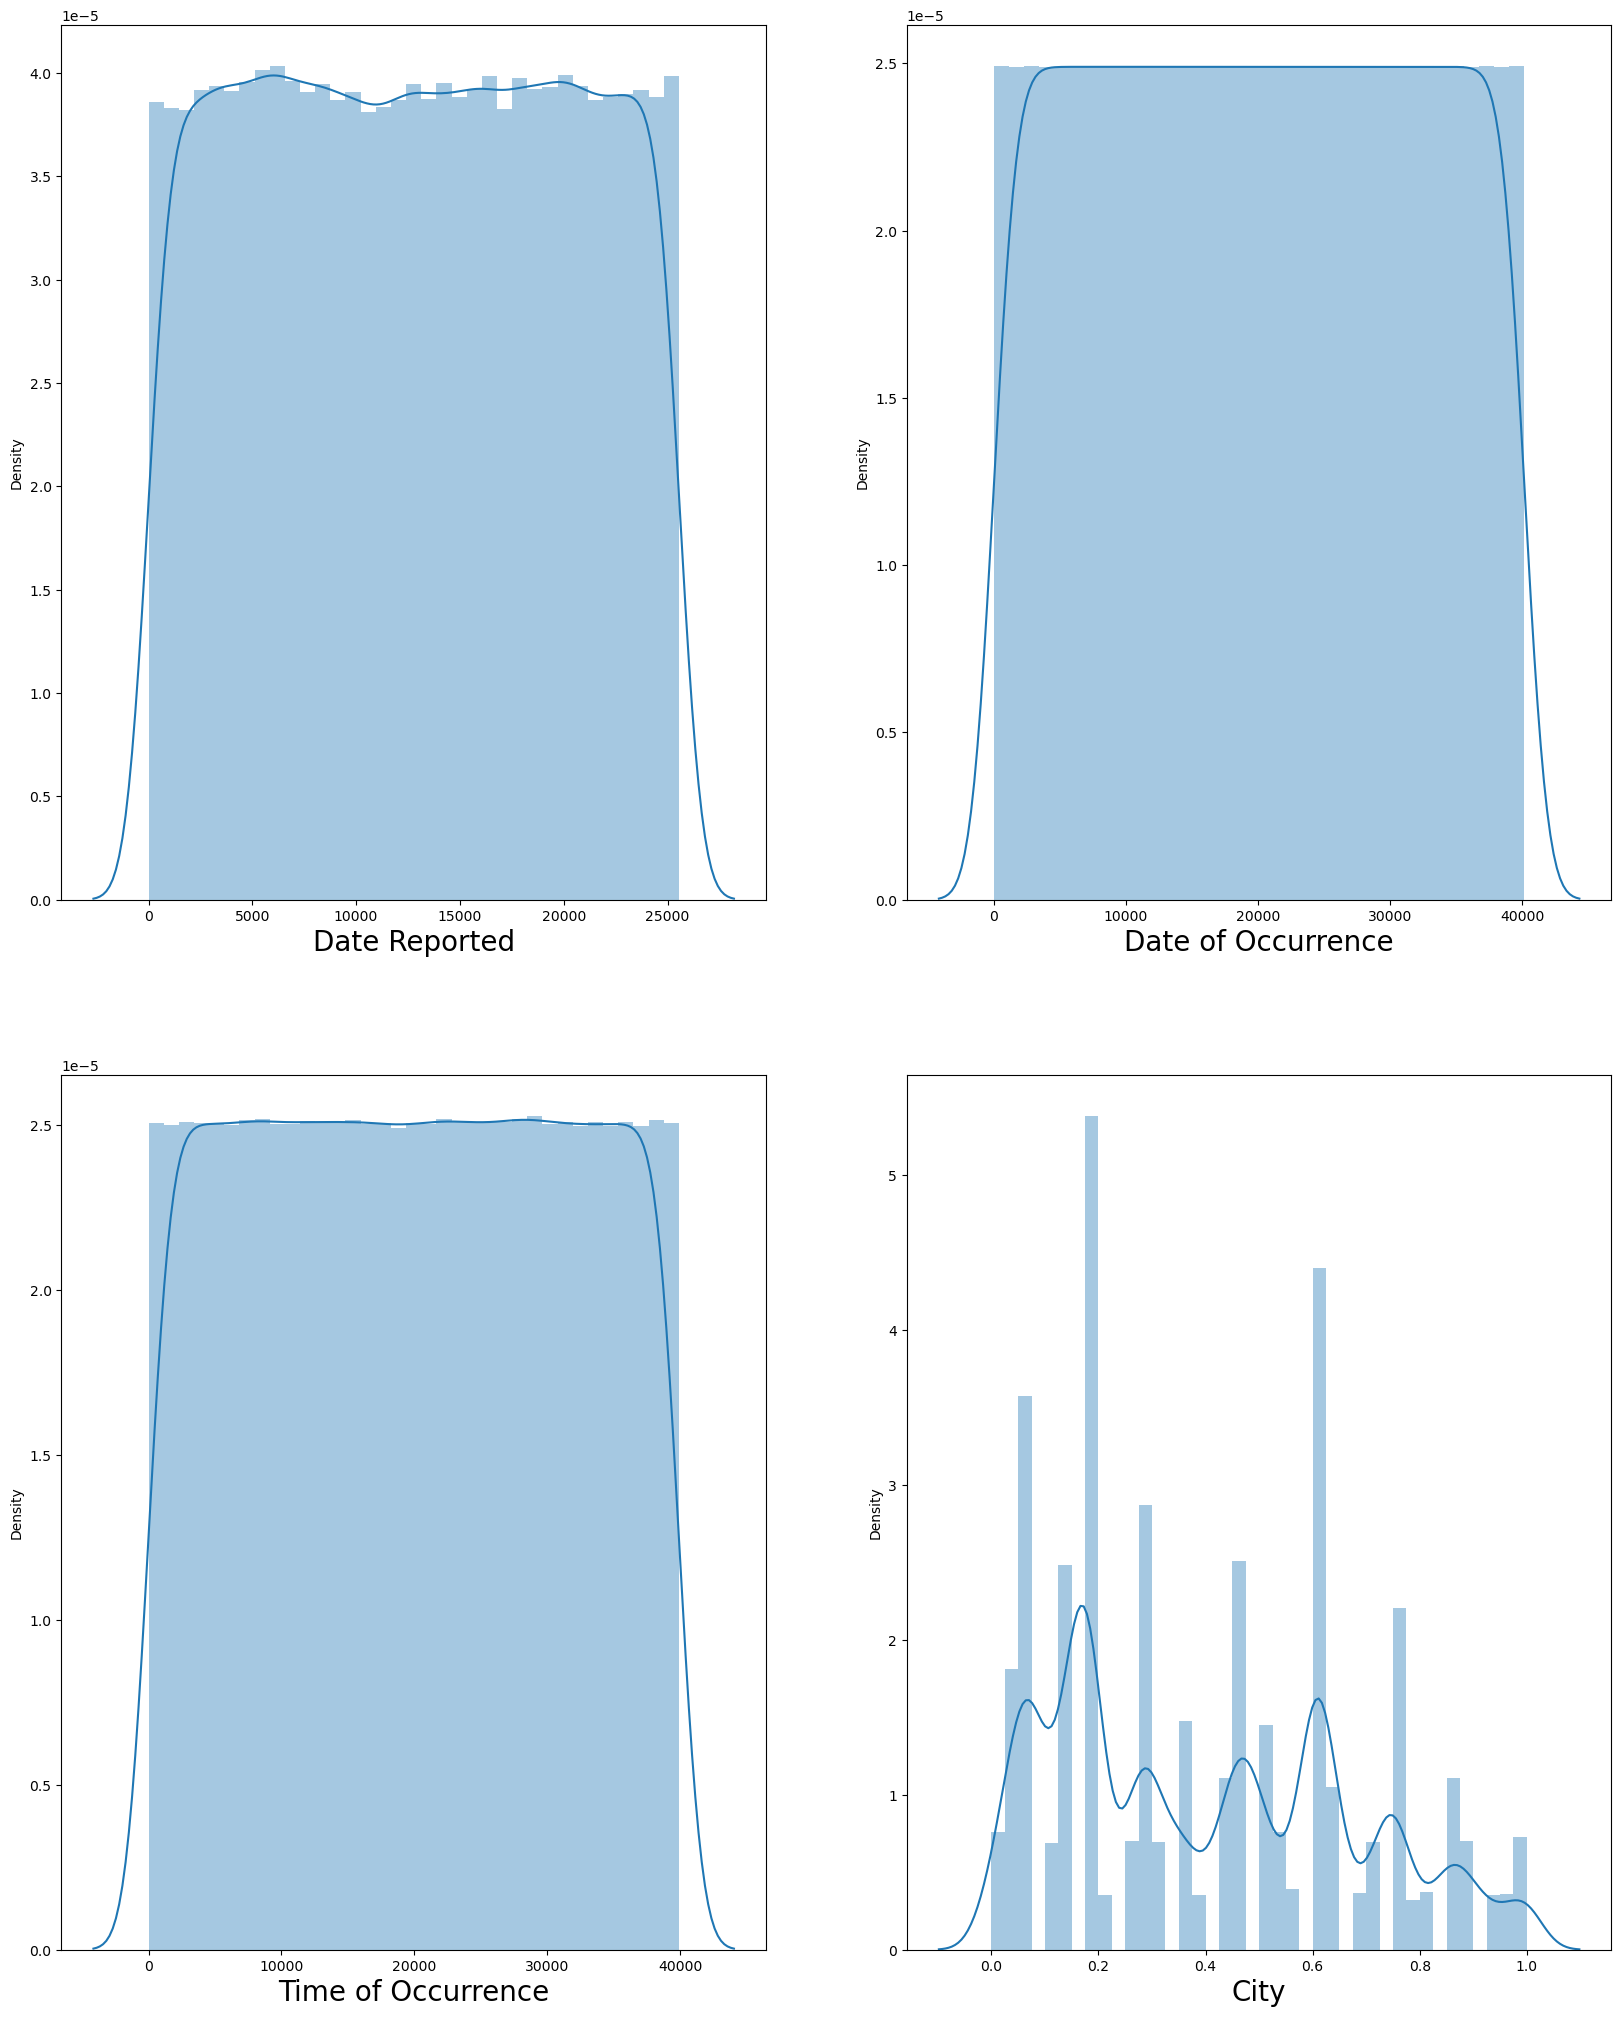

In [57]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=4 :     # as there are 9 columns in the data
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [58]:
scalar = StandardScaler()   #-3,3
x_scaled = scalar.fit_transform(x)  #z score formula used

In [59]:
x_scaled

array([[-1.6211253 , -1.73200768, -1.7324842 , ...,  1.46801891,
         0.54751537,  0.77458006],
       [-1.73429017, -1.73192142, -1.73239733, ..., -0.52083645,
        -0.18402917,  0.77458006],
       [-1.62085392, -1.73183516, -1.73222359, ..., -0.52083645,
         0.91328764,  0.77458006],
       ...,
       [-1.54066155,  0.46488485,  1.70810424, ...,  1.46801891,
        -0.73268758,  0.77458006],
       [-1.65504762,  0.46497111,  1.70749615, ...,  1.46801891,
        -1.64711826,  0.77458006],
       [ 1.7063832 ,  0.46505737,  1.70784363, ...,  1.46801891,
        -0.54980145,  0.495321  ]])

In [60]:
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)  #classification and regration used value of k
    error_rate.append(np.mean(pred_i != y_test))

In [61]:
error_rate

[0.017305776892430277,
 0.02676792828685259,
 0.026643426294820718,
 0.03212151394422311,
 0.03174800796812749,
 0.03710159362549801,
 0.03710159362549801,
 0.04071215139442231,
 0.04021414342629482,
 0.043700199203187254]

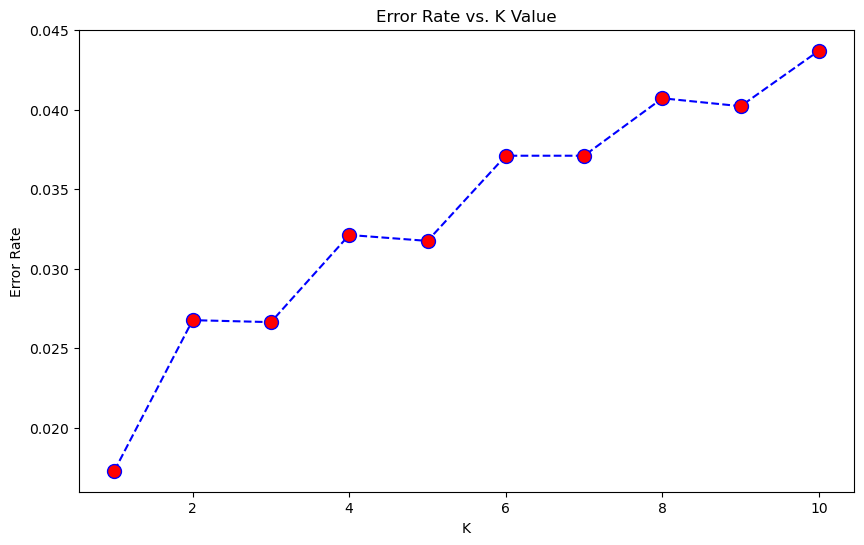

In [62]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [63]:
## Error calculation for regression task
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(1,20):
    
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)  #work

RMSE value for k=  1 is: 0.1315514229965996
RMSE value for k=  2 is: 0.13992118584050076
RMSE value for k=  3 is: 0.14802820879011394
RMSE value for k=  4 is: 0.15528837555230368
RMSE value for k=  5 is: 0.16126368498709662
RMSE value for k=  6 is: 0.1663447255823991
RMSE value for k=  7 is: 0.17074481834392546
RMSE value for k=  8 is: 0.175018229699342
RMSE value for k=  9 is: 0.17831336707790083
RMSE value for k=  10 is: 0.18112502560496274
RMSE value for k=  11 is: 0.18386098877102955
RMSE value for k=  12 is: 0.18627170720316724
RMSE value for k=  13 is: 0.18824430680822898
RMSE value for k=  14 is: 0.18998458840872315
RMSE value for k=  15 is: 0.1913061740652989
RMSE value for k=  16 is: 0.19272880216838106
RMSE value for k=  17 is: 0.19385061634308973
RMSE value for k=  18 is: 0.19469328919610995
RMSE value for k=  19 is: 0.1953424006065854


In [64]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [65]:
y_pred = knn1.predict(x_test)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4037
           1       1.00      0.94      0.97      3995

    accuracy                           0.97      8032
   macro avg       0.97      0.97      0.97      8032
weighted avg       0.97      0.97      0.97      8032



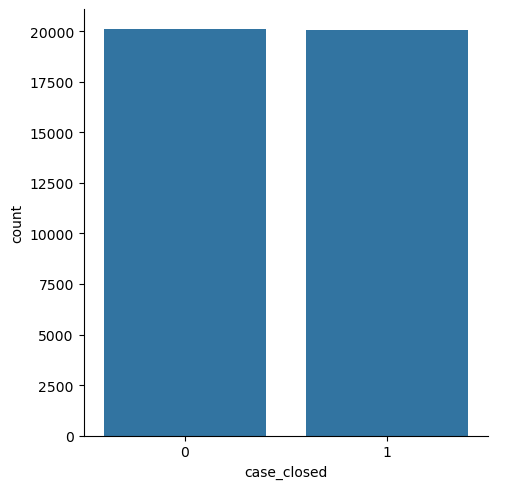

In [67]:
sns.catplot(x='case_closed',data=data,kind='count') # Imbalanced dataset

In [68]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() 

In [69]:
y_train.value_counts() 

case_closed
1    16067
0    16061
Name: count, dtype: int64

In [70]:
x_train_smote, y_train_smote = smote.fit_resample(x_train.astype('float'),y_train)

In [71]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({1: 16067, 0: 16061})
SMOTE Classes Counter({1: 16067, 0: 16067})


In [72]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train_smote, y_train_smote)

KNeighborsClassifier()

In [73]:
y_pred = knn2.predict(x_test)

In [74]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.9682519920318725


In [75]:
y_train_pred=knn2.predict(x_train_smote)

In [76]:
y_train_pred

array([1, 0, 0, ..., 0, 0, 0])

In [77]:
print("the accuracy score is :",accuracy_score(y_train_smote,y_train_pred))

the accuracy score is : 0.9745129769091928


### 4.SVC  

In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn2,x,y,cv=10,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.97443763 0.96035242 0.97207276 0.9643779  0.97101821 0.96916752
 0.96704428 0.96062176 0.96918336 0.96679537]
Cross validation Score: 0.9675071223866721
Std : 0.004425857751937816


In [80]:
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [81]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_smote, y_smote)

SVC()

In [82]:
y_hat=svclassifier.predict(x_test)

In [83]:
acc=accuracy_score(y_test,y_hat)
acc

0.975597609561753

In [84]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(x_train,y_train)#training the model
y_hat=dt.predict(x_test)#prediction
y_hat#predicted values 

array([0, 0, 0, ..., 0, 1, 1])

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [87]:
Bestparamters: ({'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'})

In [88]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [89]:
tree_cv.best_score_#getting best score form cv

1.0

In [90]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=13,min_samples_leaf= 1,min_samples_split=4,splitter='random')#passing best parameter to decision tree

In [91]:
dt1.fit(x_train,y_train)#traing model with best parameter

DecisionTreeClassifier(max_depth=13, min_samples_split=4, splitter='random')

In [92]:
y_hat1=dt1.predict(x_test)#predicting

In [93]:
acc_test=accuracy_score(y_test,y_hat1)#checking accuracy
acc_test

1.0

In [94]:
test_f1=f1_score(y_test,y_hat1)#f1_score
test_f1

1.0

In [95]:
print(classification_report(y_test,y_hat1))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4037
           1       1.00      1.00      1.00      3995

    accuracy                           1.00      8032
   macro avg       1.00      1.00      1.00      8032
weighted avg       1.00      1.00      1.00      8032



### Summary Plotting

In [114]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


In [115]:
# Initialize a dictionary to store model results
model_results = {}

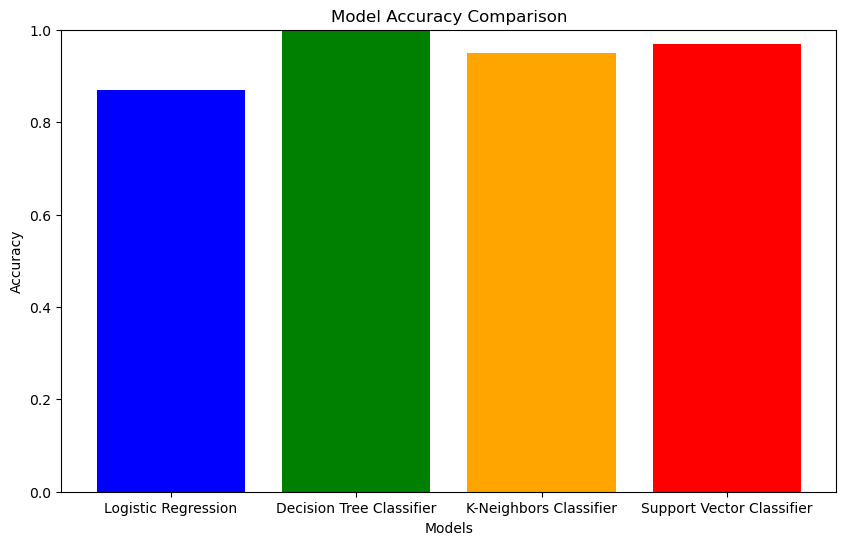

In [117]:
import matplotlib.pyplot as plt

# Example data
models = ['Logistic Regression', 'Decision Tree Classifier','K-Neighbors Classifier', 'Support Vector Classifier']
accuracies = [0.87, 1.0, 0.95, 0.97]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])

# Adding titles and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Accuracy typically ranges from 0 to 1

# Display the plot
plt.show()

### Conclusion